# --------------------------------------------------------------------------------------------
#   Nama : Edward
#   NIM : 2201741971                                                                               
#   Selected Topics in Computational Intelligence I (COMP8038041)
#   Kelas : LTY1                                                                                       
# --------------------------------------------------------------------------------------------

## ADALINE WITHOUT GENETIC AlGORITHM

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
# the features for the or model , here I have taken the possible values for combination of two inputs
features = np.array(
    [
        [0.08, 0.72],
        [0.26, 0.58],
        [0.45, 0.15],
        [0.60, 0.30],
        [0.10, 1.0],
        [0.35, 0.95],
        [0.70, 0.65],
        [0.92, 0.45]
    ])

In [3]:
# labels for the or model, here the output for the features is taken as an array
labels = np.array([1, 1, 1, 1, -1, -1, -1, -1])

In [4]:
class AdalineGD(object):
	"""ADAptive LInear NEuron classifier.
	Parameters
	-----------
	eta : float
		Learning rate (between 0.0 and 1.0)
	n_iter : int
		Passes over the training dataset.
	Attributes
	-----------
	w_ : 1d-array
		Weights after fitting.
	errors_ : list
		Number of misclassifications in every epoch.
	"""

	def __init__(self, eta = 0.1, n_iter = 100):
		self.eta = eta
		self.n_iter = n_iter

	def fit(self, X, y):

		""" Fit training data.
		Parameters
		-----------
		X : {array-like}, shape = [n_samples, n_features]
			Training vectors,
			where n_samples is the number of samples and
			n_features is the number of features.
		y : array-like, shape = [n_samples]
			Target values.
		Return
		-------
		self : object
		"""

		self.w_ = np.zeros(1 + X.shape[1])
		self.cost_ = []

		for i in range(self.n_iter):
			output = self.net_input(X)
			errors = (y - output)
			self.w_[1:] += self.eta * X.T.dot(errors)
			self.w_[0] += self.eta * errors.sum()
			cost = (errors ** 2).sum() / 2.0
			self.cost_.append(cost)
		return self

	def net_input(self, X):

		""" Calculate net input """

		return np.dot(X, self.w_[1:]) + self.w_[0]

	def activation(self, X):

		""" Compute linear activation """

		return self.net_input(X)

	def predict(self, X):

		""" Return class label after unit step """

		return np.where(self.activation(X) >= 0.0, 1, -1)

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [6]:
# Create the AdalineGD model
model1 = AdalineGD(n_iter = 100, eta = 0.1)

# Train the model
model1.fit(features,labels)

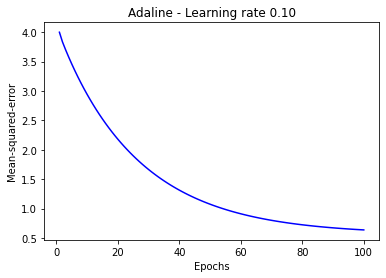

In [7]:
# Plot the training error
plt.plot(range(1, len(model1.cost_) + 1), model1.cost_, color = 'blue')
plt.title('Adaline - Learning rate 0.10')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.show()

In [8]:
print(model1.cost_[99])

0.637004118497819


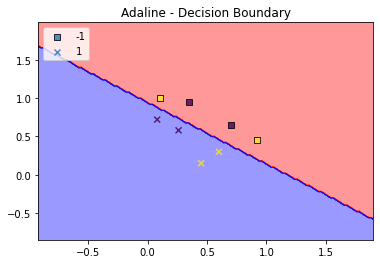

In [9]:
# Plot the decision boundary
plot_decision_regions(features,labels, classifier = model1)
plt.title('Adaline - Decision Boundary')
plt.legend(loc = 'upper left')
plt.show()

## ADALINE WITH GENETIC ALGORITHM

In [10]:
import random
import logging
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf

In [11]:
!pip install pygad

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 1.0021860260242808
Change     = 1.0021860260242808
Generation = 2
Fitness    = 1.0093894922379651
Change     = 0.007203466213684395
Generation = 3
Fitness    = 1.0093894922379651
Change     = 0.0
Generation = 4
Fitness    = 1.0864923160133204
Change     = 0.07710282377535527
Generation = 5
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 6
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 7
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 8
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 9
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 10
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 11
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 12
Fitness    = 1.0864923160133204
Change     = 0.0
Generation = 13
Fitness    = 1.0974690427870448
Change     = 0.01097672677372441
Generation = 14
Fitness    = 1.135539704360845
Change     = 0.038070661573800235
Generation = 15
Fit

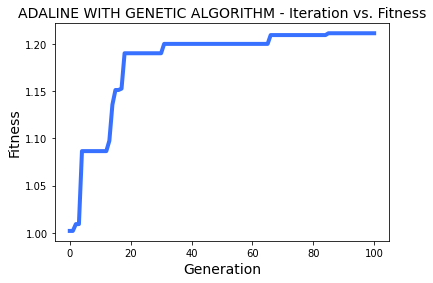

Parameters of the best solution : [ 1.02371173  1.22981482 -0.5258847  -0.12259843  0.0994051  -0.66067825
  0.47190566 -1.18985574  0.09964847]
Fitness value of the best solution = 1.2110274518998576
Index of the best solution : 0
Best fitness value reached after 85 generations.
Predictions of the trained network : [array([-0.71983955]), array([-0.61431446]), array([-0.22629071]), array([-0.39974163]), array([-0.99782012]), array([-0.99284293]), array([-0.76042729]), array([-0.60313509])]
Absolute error : 0.8257451129049155.


In [12]:
import numpy
import pygad
import pygad.nn
import pygad.gann

MSE_List = []

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs, problem_type="regression")
    # Mean Squared Error
    MSE = 1.0/numpy.mean(numpy.abs(predictions - data_outputs))
    MSE_List.append(MSE)

    return MSE

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

# Holds the fitness value of the previous generation.
last_fitness = 0

# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([[0.08, 0.72],
        [0.26, 0.58],
        [0.45, 0.15],
        [0.60, 0.30],
        [0.10, 1.0],
        [0.35, 0.95],
        [0.70, 0.65],
        [0.92, 0.45]])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([[1],[1],[1],[1],[-1],[-1],[-1],[-1]])

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# Creating an initial population of neural networks. The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.
num_solutions = 6 # A solution or a network can be used interchangeably.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[3],
                                num_neurons_output=1,
                                hidden_activations=["relu"],
                                output_activation="None")

# population does not hold the numerical weights of the network instead it holds a list of references to each last layer of each network (i.e. solution) in the population. A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements. Each element is a reference to the last layer of each network. Using such a reference, all details of the network can be accessed.
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
initial_population = population_vectors.copy()

num_parents_mating = 6 # Number of solutions to be selected as parents in the mating pool.

num_generations = 100 # Number of generations.

mutation_percent_genes = 5 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.

parent_selection_type = "sss" # Type of parent selection.

crossover_type = "single_point" # Type of the crossover operator.

mutation_type = "random" # Type of the mutation operator.

keep_parents = 1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

init_range_low = -1
init_range_high = 1

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="ADALINE WITH GENETIC ALGORITHM - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                               problem_type="regression")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

# Calculating some statistics
abs_error = numpy.mean(numpy.abs(predictions - data_outputs))
print("Absolute error : {abs_error}.".format(abs_error=abs_error))

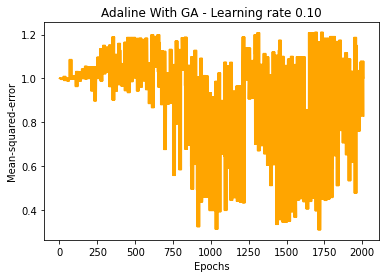

In [13]:
# Plot the training error
plt.plot(MSE_List, color = 'orange')
plt.title('Adaline With GA - Learning rate 0.10')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.show()

## COMPARISON RESULT ADALINE WITH 100 EPOCH and ADALINE WITH GENETIC ALGORITHM 100 GENERATIONS

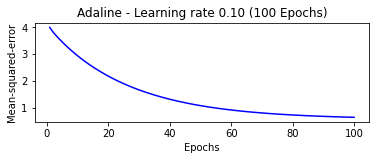

Mean Squared Error ( last epoch) :  0.637004118497819


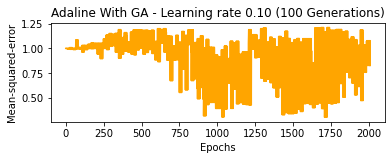

Mean Squared Error ( last generations) :  0.8290066004022892


<Figure size 432x288 with 0 Axes>

In [17]:
# using subplot function and creating plot one
# row 2, column 1, count 1
plt.subplot(2, 1, 1)
plt.plot(range(1, len(model1.cost_) + 1), model1.cost_, color = 'blue')
plt.title('Adaline - Learning rate 0.10 (100 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.show()

print('Mean Squared Error ( last epoch) : ',model1.cost_[len(model1.cost_)-1])
 
# using subplot function and creating plot two
# row 2, column 1, count 2
plt.subplot(2, 1, 2)
plt.plot(MSE_List, color = 'orange')
plt.title('Adaline With GA - Learning rate 0.10 (100 Generations)')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.show()

print('Mean Squared Error ( last generations) : ',MSE_List[len(MSE_List)-1])
 
# space between the plots
plt.tight_layout()
 
# show plot
plt.show()

### From The Result Above, ADALINE WITHOUT GA IS MORE SUITABLE FOR THIS CASE OF PROBLEM